In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(style='darkgrid')

In [2]:
columns = ['class', 'alcohol', 'malic_acid',
           'ash', 'alcalinity', 'magnesium',
           'phenols', 'flavanoids', 'nonflav_phenols',
           'proanth', 'color', 'hue', 'dil', 'proline']

df = pd.read_csv('data/wine.data',
                 names=columns,
                 index_col=None
                )

In [3]:
df

,class,alcohol,malic_acid,ash,alcalinity,magnesium,phenols,flavanoids,nonflav_phenols,proanth,color,hue,dil,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
features = ['alcohol', 'malic_acid',
           'ash', 'alcalinity', 'magnesium',
           'phenols', 'flavanoids', 'nonflav_phenols',
           'proanth', 'color', 'hue', 'dil', 'proline']

In [5]:
features_df = df[features].copy()

In [6]:
df.describe()

,class,alcohol,malic_acid,ash,alcalinity,magnesium,phenols,flavanoids,nonflav_phenols,proanth,color,hue,dil,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol            178 non-null float64
malic_acid         178 non-null float64
ash                178 non-null float64
alcalinity         178 non-null float64
magnesium          178 non-null int64
phenols            178 non-null float64
flavanoids         178 non-null float64
nonflav_phenols    178 non-null float64
proanth            178 non-null float64
color              178 non-null float64
hue                178 non-null float64
dil                178 non-null float64
proline            178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### No missing values

In [8]:
scaler = StandardScaler()
features_df[features] = scaler.fit_transform(features_df)

### Scaling the features

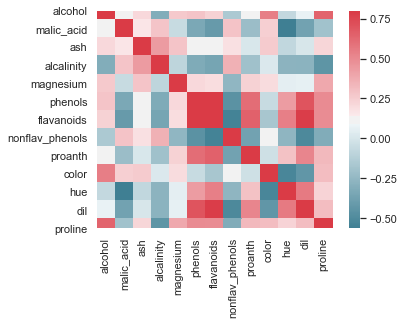

In [9]:
matrix = features_df.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
h = sns.heatmap(matrix, cmap=colormap, vmax=0.8, square=True)
plt.show()
plt.close()

### Strong correlations between the following:

__phenols and flavanoids__ (Positive)<br>
__color and hue__ (Negative)<br>
__dil and flavanoids__ (Positive)<br>

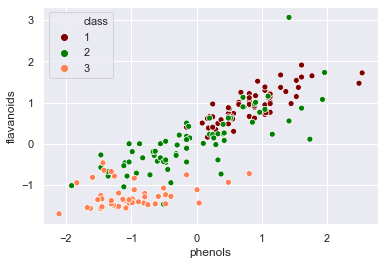

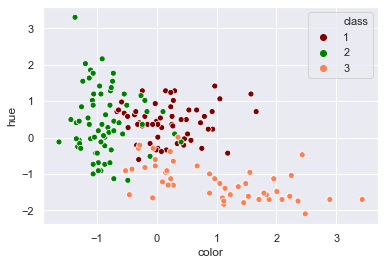

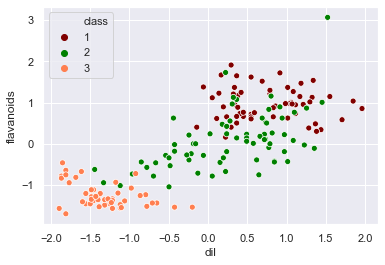

In [10]:
plot_df = features_df.copy()
plot_df['class'] = df['class']
sns.set_palette('muted')
corr_features = [
    ['phenols', 'flavanoids'],
    ['color', 'hue'],
    ['dil', 'flavanoids'],
]

for cf in corr_features:
    s = sns.scatterplot(x=cf[0], y=cf[1],
                        data=plot_df, hue='class',
                        legend='full',
                        palette=['maroon', 'green', 'coral'])
    plt.show()

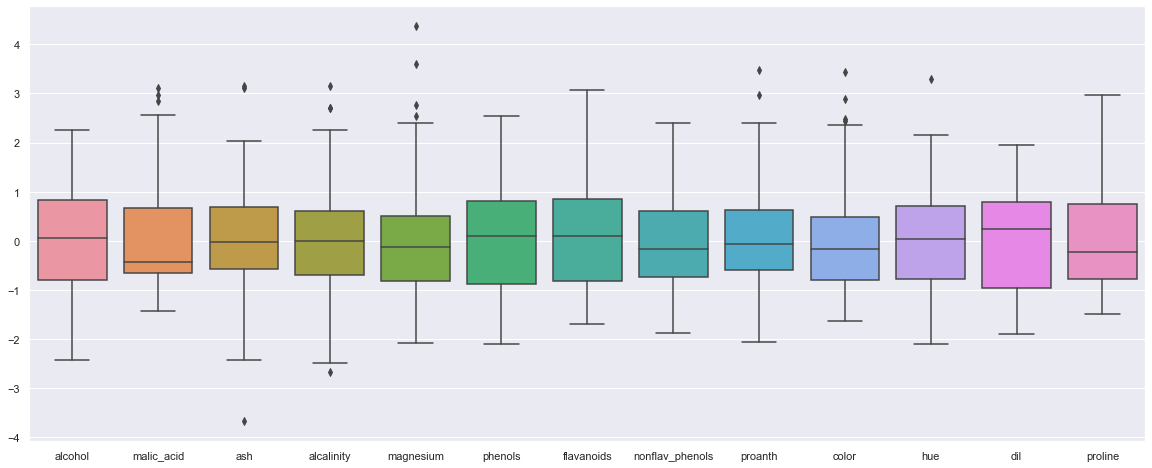

In [11]:
fig = plt.figure(figsize=[20, 8])
b = sns.boxplot(data=features_df)
plt.show()
plt.close()

### No prominent outliers

In [12]:
X = features_df.loc[:].values
y = df.loc[:, 'class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [13]:
from sklearn.svm import LinearSVC

In [17]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_train)
print('Score: ', clf.score(X_train, y_train))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Score:  1.0
